In [1]:
import sys
sys.path.append("/home/jzh/data_jzh/pints_related/gits/pySDC")

from pathlib import Path
import numpy as np
import pickle

from pySDC.implementations.controller_classes.controller_nonMPI import controller_nonMPI
from pySDC.projects.DAE.problems.IEEE9BusSystem import IEEE9BusSystem
from pySDC.projects.DAE.sweepers.fully_implicit_DAE import fully_implicit_DAE
from pySDC.projects.DAE.sweepers.implicit_Euler_DAE import implicit_Euler_DAE
from pySDC.projects.DAE.misc.HookClass_DAE import approx_solution_hook
from pySDC.projects.DAE.misc.HookClass_DAE import error_hook
from pySDC.helpers.stats_helper import get_sorted
import pySDC.helpers.plot_helper as plt_helper


"""
Routine to run model problem
"""

# initialize level parameters
level_params = dict()
level_params['restol'] = 1e-12
level_params['dt'] = 5*1e-3 

# initialize sweeper parameters
sweeper_params = dict()
sweeper_params['quad_type'] = 'RADAU-RIGHT'
sweeper_params['num_nodes'] = 2
sweeper_params['QI'] = 'LU'

# initialize problem parameters
problem_params = dict()
problem_params['nvars'] = 28
problem_params['newton_tol'] = 1e-12

# initialize controller parameters
controller_params = dict()
controller_params['logger_level'] = 30
controller_params['hook_class'] = approx_solution_hook

# initialize step parameters
step_params = dict()
step_params['maxiter'] = 50


problem = IEEE9BusSystem
# Fill description dictionary for easy hierarchy creation
description = dict()
description['problem_class'] = problem
description['problem_params'] = problem_params
description['sweeper_class'] = fully_implicit_DAE
description['sweeper_params'] = sweeper_params
description['level_params'] = level_params
description['step_params'] = step_params

Path("data").mkdir(parents=True, exist_ok=True)

# instantiate the controller
controller = controller_nonMPI(num_procs=1, controller_params=controller_params, description=description)

# set time parameters
t0 = 0.0
Tend = 0.3  # 0.5
# get initial values on finest level
P = controller.MS[0].levels[0].prob
uinit = P.u_exact(t0)

# call main function to get things done...
uend, stats = controller.run(u0=uinit, t0=t0, Tend=Tend)

m = 3
n = 9
x0 = np.array([1.0591, 0.79193, 0.77098, 1.077, 0.76899, 0.71139, 0, 0.62385, 0.62505, 0.015514,
            -0.71253, -0.73358, 0.061423, 1.0645, 0.94343, 376.99, 376.99, 376.99, 1.0849,
            1.7917, 1.4051, 0.19528, 0.3225, 0.25292, 1.1077, 1.905, 1.4538, 0.71863, 1.6366,
            0.85245, 0.71863, 1.6366, 0.85245, 1.0591, 0.79193, 0.77098, 1.077, 0.76899, 0.71139, 0, 0.62385, 0.62505, 0.015514, -0.71253, -0.73358, 0.061423, 1.0645, 0.94343, 376.99, 376.99, 376.99, 1.0849, 1.7917, 1.4051, 0.19528, 0.3225, 0.25292, 1.1077, 1.905, 1.4538, 0.71863, 1.6366, 0.85245, 0.71863, 1.6366, 0.85245, 0.30185, 1.2884, 0.56058, 0.67159, 0.93446, 0.62021, 1.04, 1.025, 1.025, 1.0258, 0.99563, 1.0127, 1.0258, 1.0159, 1.0324, 0, 0.16197, 0.081415, -0.03869, -0.069618, -0.064357, 0.064921, 0.012698, 0.034326])
# V = np.array([me[1][11*m + 2*m:11*m + 2*m + n] for me in get_sorted(stats, type='approx_solution', sortby='time')])
# V = np.array([me[1][11*m + 2*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
t = np.array([me[0] for me in get_sorted(stats, type='approx_solution', sortby='time')])
# print([me[1][11*m + 2*m:11*m + 2*m + n] for me in get_sorted(stats, type='approx_solution', sortby='time', recomputed=False)])
Eqp = np.array([me[1][0:m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
Si1d = np.array([me[1][m:2*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
Edp = np.array([me[1][2*m:3*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
ESi2q = np.array([me[1][3*m:4*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
Delta = np.array([me[1][4*m:5*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
w = np.array([me[1][5*m:6*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
Efd = np.array([me[1][6*m:7*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
RF = np.array([me[1][7*m:8*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
VR = np.array([me[1][8*m:9*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
TM = np.array([me[1][9*m:10*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
PSV = np.array([me[1][10*m:11*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
Id = np.array([me[1][11*m:11*m + m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
Iq = np.array([me[1][11*m + m:11*m + 2*m] for me in get_sorted(stats, type='approx_solution', sortby='time')])
V = np.array([me[1][11*m + 2*m:11*m + 2*m + n] for me in get_sorted(stats, type='approx_solution', sortby='time')])
TH = np.array([me[1][11*m + 2*m + n:11*m + 2*m + 2 * n] for me in get_sorted(stats, type='approx_solution', sortby='time')])

# print('Eqp=', Eqp - x0[0:m])
# print('Si1d=', Si1d - x0[m:2*m])
# print('Edp=', Edp - x0[2*m:3*m])
# print('ESi2q=', ESi2q - x0[3*m:4*m])
# print('Delta=', Delta - x0[4*m:5*m])
# print('w=', w - x0[5*m:6*m])
# print('Efd=', Efd - x0[6*m:7*m])
# print('RF=', RF - x0[7*m:8*m])
# print('VR=', VR - x0[8*m:9*m])
# print('TM=', TM - x0[9*m:10*m])
# print('PSV=', PSV - x0[10*m:11*m])
# print('Id=', Id - x0[11*m:12*m])
# print('Iq=', Iq - x0[12*m:13*m])
# print('V=', V - x0[11*m + 2*m:11*m + 2*m + n])
# print('TH=', TH - x0[11*m + 2*m + n:11*m + 2*m + 2 * n])


    


PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power flow converged in 4 iterations.

Converged in 0.02 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              9     Total Gen Capacity     820.0        -900.0 to 900.0
Generators         3     On-line Capacity       820.0        -900.0 to 900.0
Committed Gens     3     Generation (actual)    319.0              35.0
Loads              3     Load                   315.0             115.0
  Fixed            3       Fixed                315.0             115.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           9     Losses (I^2 * Z)         4.95             51.31
Transformers       0     Branc

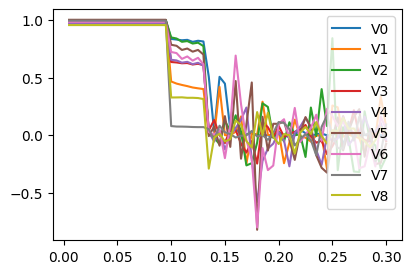

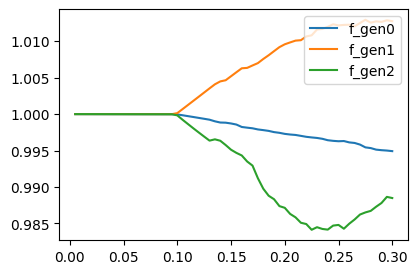

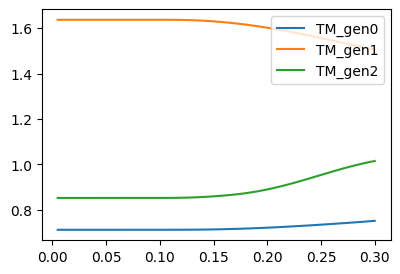

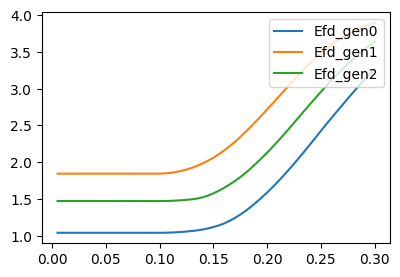

In [2]:
fig3, ax3 = plt_helper.plt.subplots(1, 1, figsize=(4.5, 3))
ax3.plot(t, V[:, 0], label='V0')
ax3.plot(t, V[:, 1], label='V1')
ax3.plot(t, V[:, 2], label='V2')
ax3.plot(t, V[:, 3], label='V3')
ax3.plot(t, V[:, 4], label='V4')
ax3.plot(t, V[:, 5], label='V5')
ax3.plot(t, V[:, 6], label='V6')
ax3.plot(t, V[:, 7], label='V7')
ax3.plot(t, V[:, 8], label='V8')
ax3.legend(loc='upper right', fontsize=10)
plt_helper.plt.show()
# fig3.savefig('data/V0.png', dpi=300, bbox_inches='tight')
# plt_helper.plt.close(fig3)
fig4, ax4 = plt_helper.plt.subplots(1, 1, figsize=(4.5, 3))
ax4.plot(t, w[:, 0]/ 120 / np.pi, label='f_gen0')
ax4.plot(t, w[:, 1]/ 120 / np.pi, label='f_gen1')
ax4.plot(t, w[:, 2]/ 120 / np.pi, label='f_gen2')
ax4.legend(loc='upper right', fontsize=10)
plt_helper.plt.show()

fig5, ax5 = plt_helper.plt.subplots(1, 1, figsize=(4.5, 3))
ax5.plot(t, TM[:, 0], label='TM_gen0')
ax5.plot(t, TM[:, 1], label='TM_gen1')
ax5.plot(t, TM[:, 2], label='TM_gen2')
ax5.legend(loc='upper right', fontsize=10)
plt_helper.plt.show()

fig6, ax6 = plt_helper.plt.subplots(1, 1, figsize=(4.5, 3))
ax6.plot(t, Efd[:, 0], label='Efd_gen0')
ax6.plot(t, Efd[:, 1], label='Efd_gen1')
ax6.plot(t, Efd[:, 2], label='Efd_gen2')
ax6.legend(loc='upper right', fontsize=10)
plt_helper.plt.show()


In [3]:
Efd[:, 0]

array([1.04246277, 1.04246351, 1.04246472, 1.04246636, 1.04246842,
       1.04247087, 1.04247368, 1.04247683, 1.0424803 , 1.04248408,
       1.04248813, 1.04249245, 1.04249701, 1.04250179, 1.04250677,
       1.04251195, 1.04251729, 1.04252279, 1.04252842, 1.04253338,
       1.04347946, 1.04569214, 1.04913068, 1.05377143, 1.05959648,
       1.06654205, 1.07504959, 1.08635198, 1.10177462, 1.1203772 ,
       1.1420507 , 1.16973948, 1.20362645, 1.24363384, 1.28938545,
       1.34055954, 1.3968569 , 1.45809047, 1.52229999, 1.58998598,
       1.66155074, 1.73675751, 1.81521212, 1.89639511, 1.9801763 ,
       2.0663008 , 2.15440979, 2.24406054, 2.33488501, 2.42664875,
       2.51709254, 2.60500995, 2.69211396, 2.77878894, 2.86471831,
       2.94947767, 3.03267414, 3.11363785, 3.19172786, 3.26647727])

In [19]:
Efd = [1.2, 2.0, 2.1]

In [20]:
Efd = np.array([min(x, 2.0) for x in Efd])
Efd

array([1.2, 2. , 2. ])

In [21]:
dEfd=np.array([1.2, 0.13, 0.56])

In [22]:
indices_to_change = np.where(Efd == 2.0)[0]
dEfd[indices_to_change] = 0
dEfd
# indices_to_change


array([1.2, 0. , 0. ])

In [23]:
f= np.array([1.2,2.4,3.1,4.6,5.9])

In [24]:
f[1:4][indices_to_change] = dEfd[indices_to_change]
f

array([1.2, 2.4, 0. , 0. , 5.9])

In [3]:
import numpy as np


In [25]:
f = [1.0, 2.0, 3.0]
test = f[1]

test = 999
f

[1.0, 2.0, 3.0]